# Generate TChain and Render

In [1]:
import os
import ROOT

Welcome to JupyROOT 6.24/06


In [2]:
cwd = os.getcwd()
build_path = os.path.join(os.path.dirname(cwd), "build")

libpath = os.path.join(build_path, "libRootDict.dylib")
ROOT.gSystem.Load(libpath)


root_file_names = [os.path.join(build_path, fname) for fname in os.listdir(build_path) if os.path.isfile(os.path.join(build_path, fname)) and fname.lower().endswith(".root")]

chain = ROOT.TChain("sim")
for fname in root_file_names:
    chain.AddFile(fname)

c = ROOT.TCanvas()

## Calo

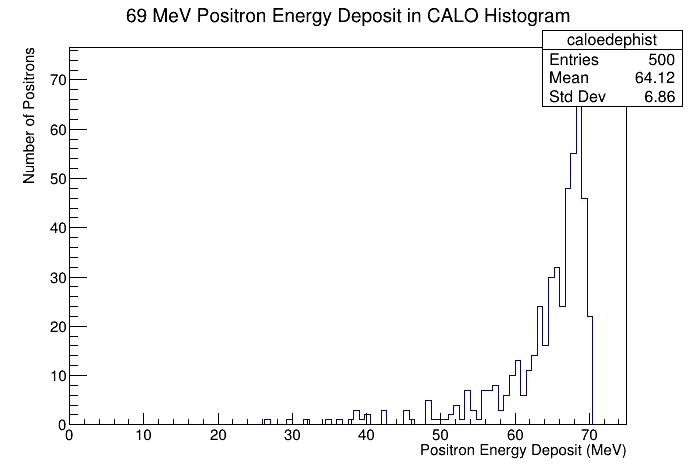

In [6]:
try:
    del h
except NameError:
    print("Defining a new histogram.")
h = ROOT.TH1F("caloedephist", "69 MeV Positron Energy Deposit in CALO Histogram;Positron Energy Deposit (MeV);Number of Positrons", 100, 0, 75)

chain.Draw("calo.edep >> caloedephist")
c.SetLogy(False)
c.Update()
c.Draw()

## SiPM

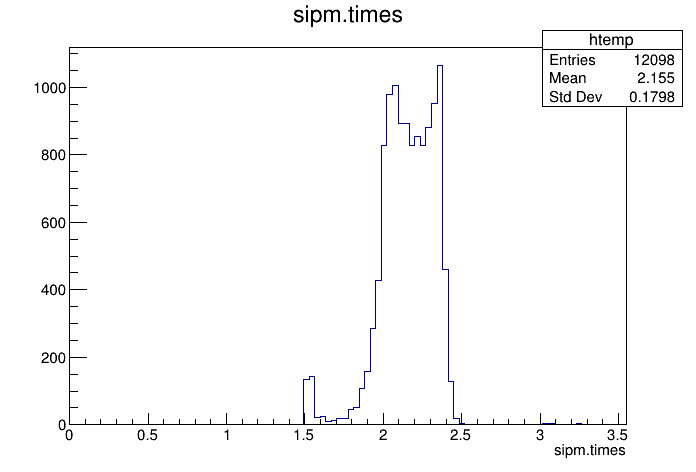

In [7]:
chain.Draw("sipm.times")
c.SetLogy(False)
c.Update()
c.Draw()

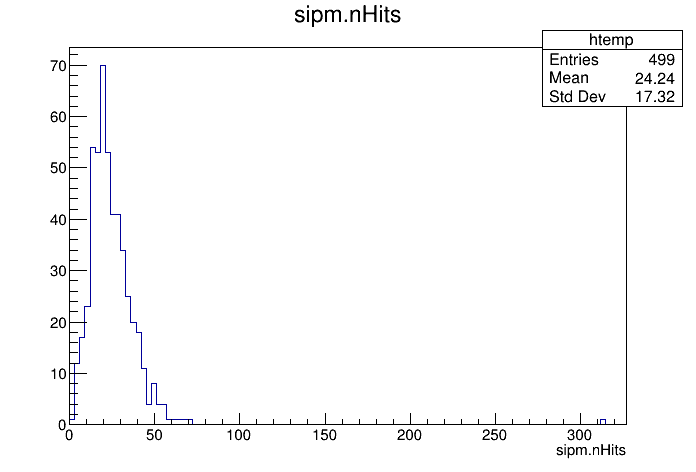

In [8]:
chain.Draw("sipm.nHits")
c.SetLogy(False)
c.Update()
c.Draw()